In [1]:
import numpy as np
import pandas as pd
import glob
import os
import time 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
# Shape of each representation
npy_paths_clmr = sorted(glob.glob('features_our/clmr/*.npy'))
npy_paths_musicnn = sorted(glob.glob('features_our/musicnn/*.npy'))
npy_paths_jukebox_zeropad = sorted(glob.glob('features_our/jukebox/*.npy'))

# Feature representations
X_clmr = np.array([np.load(p) for p in npy_paths_clmr])
X_musicnn = np.array([np.load(p) for p in npy_paths_musicnn])
X_jukebox_zeropad = np.array([np.load(p) for p in npy_paths_jukebox_zeropad])

# Labels
y_clmr = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_clmr])
y_musicnn = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_musicnn])
y_jukebox_zeropad = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_jukebox_zeropad])

In [32]:
print(X_clmr.shape)
print(X_jukebox_zeropad.shape)
print(X_musicnn.shape)

(12291, 512)
(11588, 4800)
(12291, 4194)


In [26]:
def umap(X, y):
    reducer = UMAP()

    # Fit and transform the data
    X_trans = reducer.fit_transform(X)
    y = pd.Series(y)

    plt.figure(figsize=(20,15))
    plt.scatter(
        X_trans[:, 0],
        X_trans[:, 1],
        c= [sns.color_palette()[x] for x in y.map({"airport":0, "bus":1, "metro":2, 
                                                        "metro_station": 3, "park":4, "public_square":5, 
                                                        "shopping_mall":6, "street_pedestrian":7, "street_traffic":8, "tram":9})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Clmr dataset', fontsize=24)

    plt.show()

## Clmr

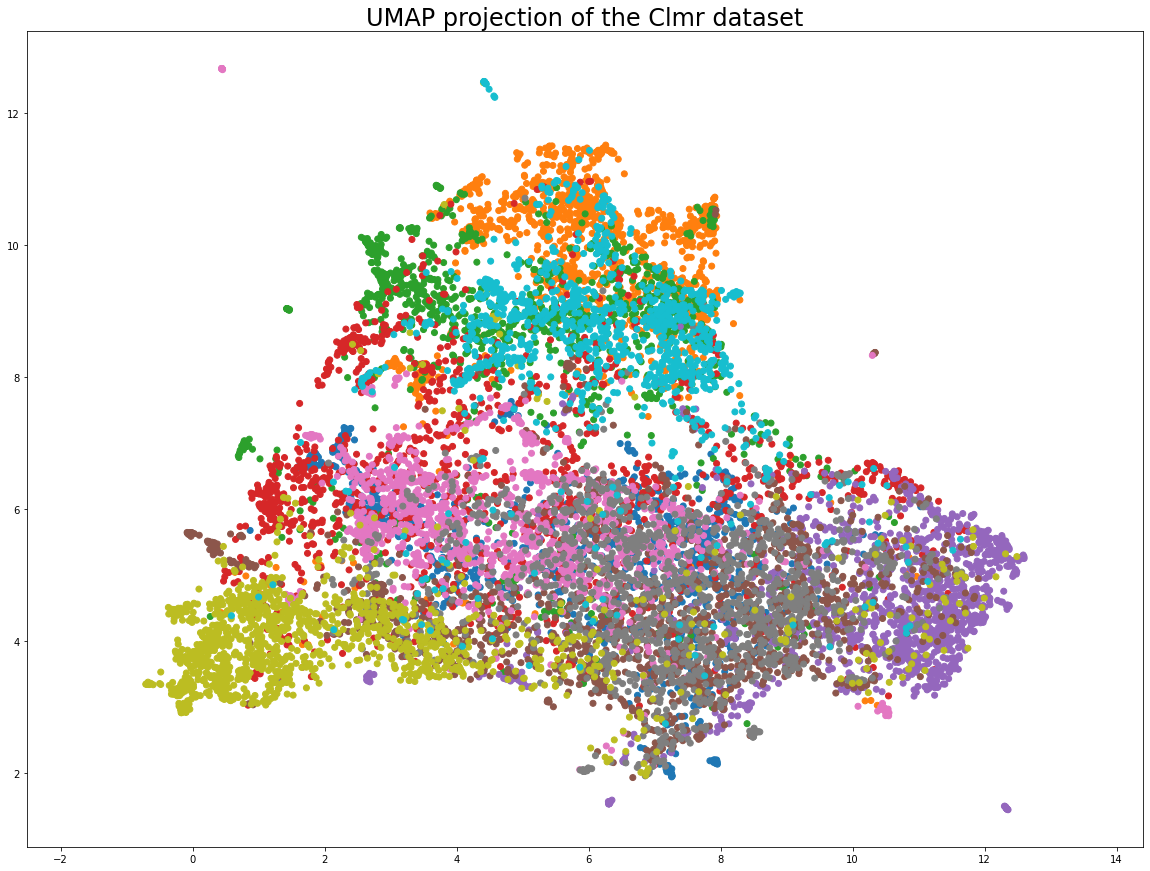

In [27]:
umap(X_clmr, y_clmr)

## Musicnn

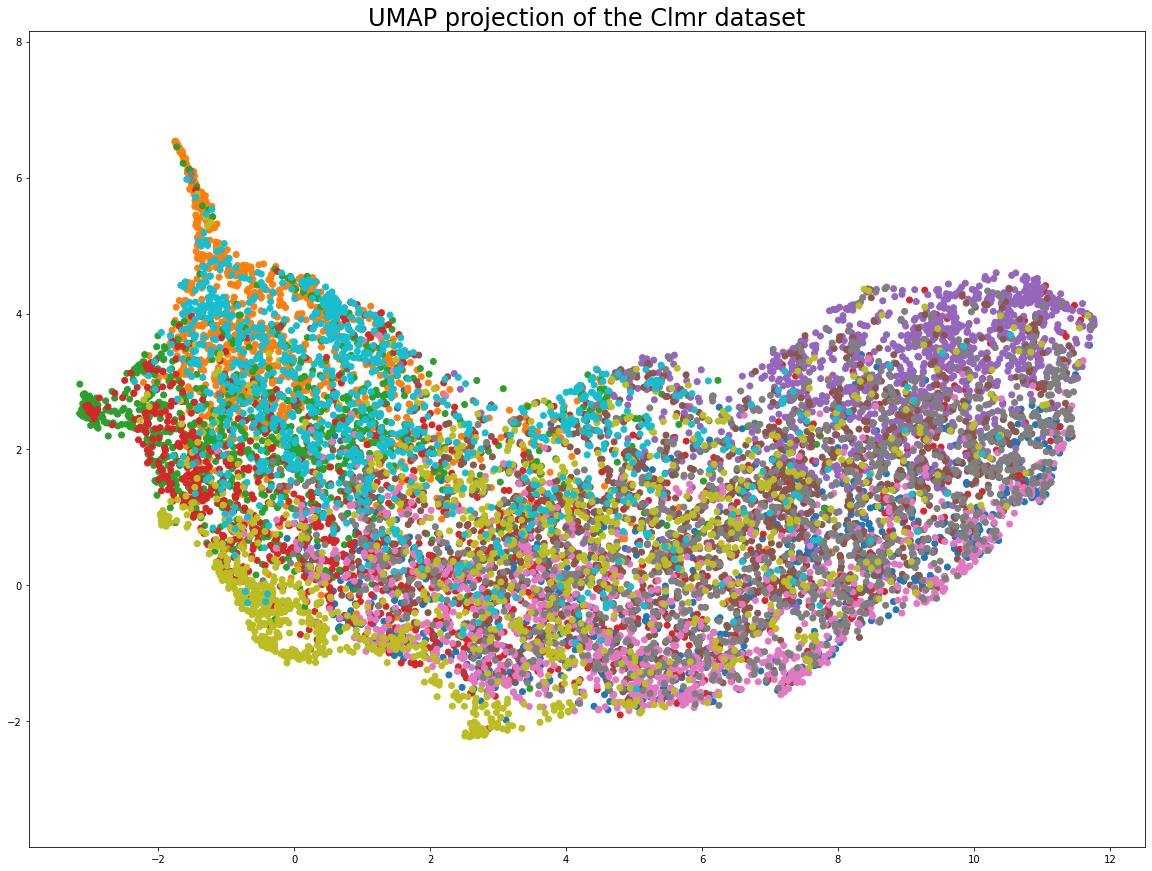

In [28]:
umap(X_musicnn, y_musicnn)

## Jukebox (0-pad)

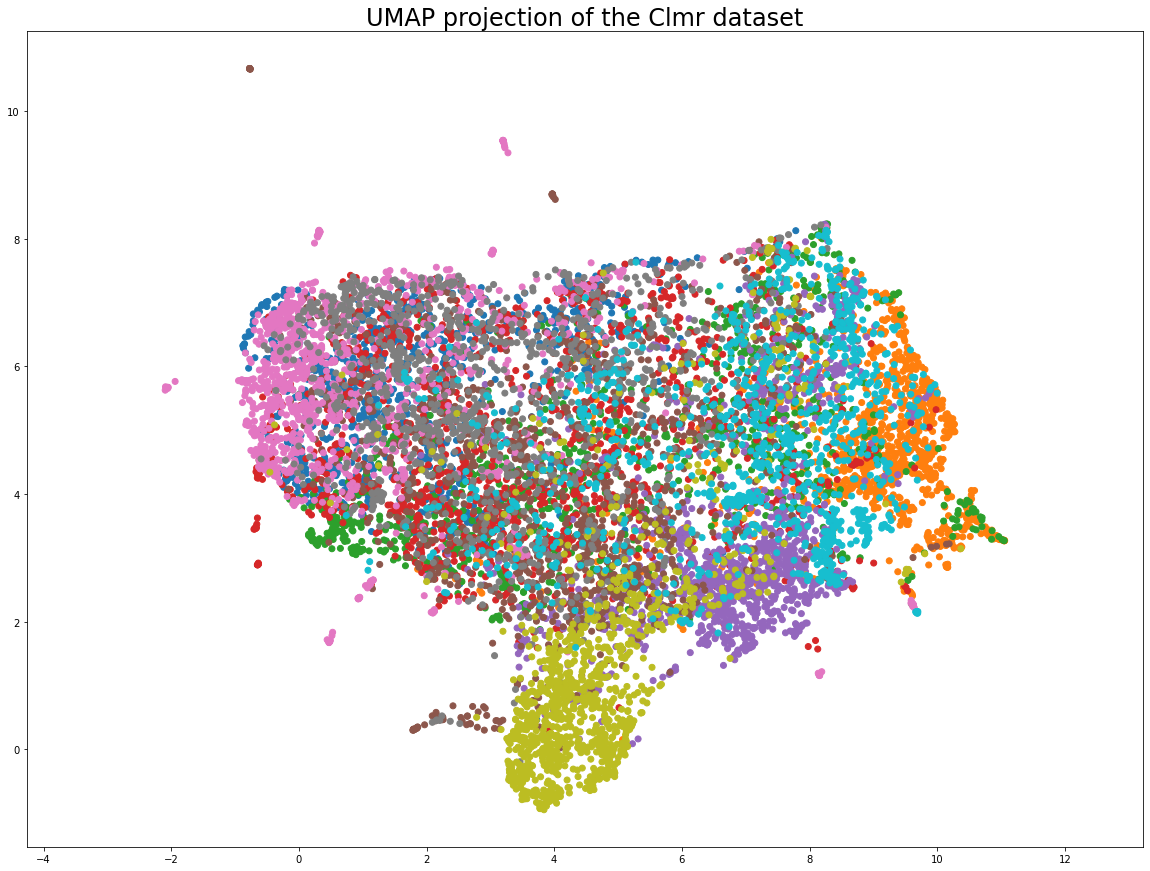

In [30]:
umap(X_jukebox_zeropad, y_jukebox_zeropad)